# MC225 - Numerical and Computational Methods
## Lab Exam 
## May 1, 2023, 2 pm - 4:30 pm
## Maximum Marks: 15
## Student Name: $\underline{\hspace{2.5in}Pranav Patel}$ Student ID No. $\underline{\hspace{1.5in}202103040}$
***

***
#### 1. Fill in your Name and ID No. above.
#### 2. The deadline for submitting your notebook on Moodle is 4:30 pm.
#### 3. Do not import any library not specified in the cell below.
***

### There are mainly two questions that you are supposed to solve. Assume a random variable $x$ which has Gaussian/Normal distribution with specified mean and standard deviation. You need to write functions to (Q.1) estimate the cumulative distribution function(CDF) for any specified value of $x$, and (Q.2) estimating the value of a random variable for any specified value of CDF. (Q.3) involves plotting the CDF using an in-built python function, and functions written in Q.1 and Q.2, and is more or less written for you. More details of each question in provided in the corresponding cells.
#### 1. You must use concepts from this course to solve both questions, and you must not use in-built functions that directly computes the CDF. You can only use the in-built function to verify the correctness/accuracy of your function, and in Q.3
#### 2. The in-built function to compute the CDF is specified in the cell before Q.2

In [1]:
# Only libraries mentioned below must be used throughout your code.
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
# The statistics library must be used only to verify the correctness of your functions.
# The relevant functions from this library are written in the cells where your can 
# verify the correctness/accuracy of your functions.
# from statistics import NormalDist

### Q.1 The Gaussian distribution of a random variable $x$ is given by $$ p(x) = \frac{1}{\sigma \sqrt{2 \pi}} \exp\left(-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2\right)$$ where $\mu$ and $\sigma$ are the mean and standard deviation of the distribution. Write a python function `myGaussianProb` that takes in $\mu$, $\sigma$, and a real number $a$, and returns the probability $$P(x \leq a) = \int_{-\infty}^a p(y) \ dy,$$ using appropriate Numerical integration method. Handle $-\infty$ with care! The function `mynormal`, given below for your convenience, computes the integrand $p(x)$ for specified values of $x,\mu$ and $\sigma$. 
### <div style='text-align: right'><em>**[5]**</em></div>


In [2]:
### Use the following function to compute p(x)
### Gaussian pdf

def mynormal(x,mu,sig):
    return (1/(sig*np.sqrt(2*np.pi)))*np.exp(-0.5*((x-mu)/sig)**2)

In [142]:
# c = 3
# sig = 15
# mu = 10

# x = np.linspace(-75+10, 75+10)
# y = mynormal(x, mu, sig)

# plt.scatter([mu-c*sig], [mynormal(mu-c*sig, mu, sig)])
# plt.plot(x,y)
# plt.show()


In [3]:
# Integration Function
def mytrapezoidNorm(a, b, n, mu, sig):
   points = np.linspace(a, b, n)
   fpoints = mynormal(points, mu, sig)
 
   h = (b-a)/(n-1)
   
   sumterm = np.sum([fpoints[1:n-1]])
   
   return 1/2 * h * (f(a) + f(b) + (2* sumterm))

def mysimpsonNorm(a, b, n, mu, sig):
    if(n%2!=0):
        points  = np.linspace(a,b,n)
        h = (b-a)/(n-1)  
    else:
        points  = np.linspace(a,b,n+1)
        h = (b-a)/(n) 
    y = mynormal(points, mu, sig)  
    I = (h/3) * (y[0]+y[n-1]+2*np.sum(y[2:n-2:2])+4*np.sum(y[1:n-1:2]))
    return I


In [4]:
### Write your function (myGaussianProb) here.
### For any additional functions that might be needed in the following function, 
### create additional cell(s) and write these functions there.
### [Once you write these functions in the additional cells and compile these cells, 
### these functions can be directly used in any cell below without re-writing them.]
def myGaussianProb(mu,sig,a):
    c = 4 # approximation constant that gets multiplied to the value of sig => -inf ~= c * sig
    inf = mu - (c * sig)
    
    n = 1000
    Pxa = mysimpsonNorm(inf, a, n, mu, sig)     
    
    
    return Pxa # P(x<= a)

In [5]:
### Verify the correctness of your function myGaussianProb in this cell
### Set parameters - mu,sig,a
mu=1
sig=2
a = -9.25

### Evaluate your function and compare. 
### You may check for different mu,sig,a values
print(myGaussianProb(mu,sig,a))

### In-built function that computes P(x<=a). Note the following function should not be 
### used in any of your functions.
N = norm(mu, sig)
print(N.cdf(a))

-3.152068437824551e-05
1.4876887318776573e-07


### <font color=red> Why do you set the lower integration limit to $\mu-4\sigma$? If $a < \mu-4\sigma$, then your code outputs a negative probability (although small). Q.1 - 3/5 <font>

In [8]:
mu=30
sig=10.5
a = 20.5

### Evaluate your function and compare. 
### You may check for different mu,sig,a values
print(myGaussianProb(mu,sig,a))

### In-built function that computes P(x<=a). Note the following function should not be 
### used in any of your functions.
N = norm(mu, sig)
print(N.cdf(a))

0.18112932722380984
0.18279576878241605


In [9]:
# Interpolation using Newton's Polynomial

# Function that will take an function parameter and range[a, b] and it will plot the graph using plt.plot
def plotfx(fx, a, b):
  xn = np.linspace(a, b, 1000)
  yn = fx(xn)
  plt.plot(xn, yn)
  # return yn

# mynewtonint function

def evalPn(x, coeff, xy): #method that evaluate the polynomial with the basis 1, (x-x0), (x-x0)(x-1),...
  eval = 0;
  for i in range(len(coeff)):
    eval = eval + coeff[i] * wk(x, i, xy)
  return eval


def wk(x, k, xy): #This function computes the values W_k(x)
  wi = 1
  for i in range(k):
    wi = wi * (x - xy[i][0])

  return wi

def kPn(x, coeff, xy): # This function computes the value of P^(k-1)(x)
  evaPol = 0
  k = len(coeff)
  for i in range(k):
    evaPol += coeff[i] * wk(x, i, xy)
    
  return evaPol

#Given a n x 2 matrix it will find the coefficient of the polynomial which passes through the points given in the matrix
def mynewtonint(xy):
  coeff = [];

  for i in range(len(xy)):
    xi = xy[i][0]
    yi = xy[i][1]
    denom = wk(xi, i, xy)
    term = (yi - kPn(xi, coeff, xy))/denom
    # print(i, w)
    coeff = np.append(coeff, term)
    # coeff[1] = np.append(coeff[1], denom)
  return coeff

#Given a vector of coefficient and n x 2 matrix of sample point the function will plot the graph ot the polynomial whose cofficients are given in function argument
def plotPn(coeff, xy):
  samplex0 = np.array(xy[  : ,0])
  sampley0 = np.array(xy[  : ,1])
  a = np.min(samplex0)
  b = np.max(samplex0)

  xn = np.linspace(a, b, 100)
  fx = evalPn(xn, coeff, xy)

  plt.scatter(samplex0, sampley0, marker='o')
  plt.plot(xn, fx, color='r')
  plt.show()

In [10]:
def rangeMap(a, b, a1, b1, x):
    # x = np.linspace(a, b, 1000)
    x_new_range = ((x - a) * (b1 - a1) / (b-a)) + a1
    return x_new_range

In [11]:
def mychebynodes(n):
  xk = np.array([])
  for k in range(n):
    zk = ((2*k + 1)/(2*n))*np.pi
    xk = np.append(xk, np.cos(zk))
  
  return xk

In [12]:
# Interpolating using natrural spline
def find_next_indexes(x, arr):
    next_smaller = None
    next_bigger = None
    for i in range(len(arr)):
        if arr[i] < x:
            if next_smaller is None or arr[i] > arr[next_smaller]:
                next_smaller = i
        elif arr[i] > x:
            if next_bigger is None or arr[i] <= arr[next_bigger]:
                next_bigger = i
    if next_smaller == None:
        next_smaller = 0
    
    return next_smaller, next_bigger

# Functions that Evaluate the S(x) = P(x)_i , where i=0, 1, 2, .., n-1
def S(val, coeff, data_points):
    k, k1 = find_next_indexes(val,data_points)
    poly = coeff[k,:] # some function that returns you the coefficients for the P(x)_i given x
    # poly = poly.reshape((4,1))
    eval = (poly[0] + (poly[1] * val) + (poly[2] * (val**2)) + (poly[3] * (val**3)))    
    return eval

### Natural Cubic Splines
### def mynaturalcubicsplines(n):

def mynaturalcubicsplines(x, y, n):
    matlar = np.zeros((4*n,4*n))
    # y_fin = np.zeros((4*n,1))
    y_fin = []
    for i in range(n):
        blockMat = []
        x_k = x[i]
        x_k1 = x[i+1]
        y_fin = np.append(y_fin, [y[i], y[i+1], 0, 0])

        r1 = np.array([1, x_k, x_k ** 2, x_k ** 3, 0, 0, 0,0]) # n x 8 
        r2 = np.array([1, x_k1, x_k1 ** 2, x_k1 ** 3, 0, 0, 0,0]) # n x 8
        if(i != n-1):
            r3 = np.array([0, 1, 2 * x_k1, 3 * (x_k1 ** 2), 0, -1, -2 * x_k1, -3 * (x_k1 ** 2) ]) # n-1 x 8 
            r4 = np.array([0, 0, 2, 6 * x_k1, 0, 0, -2, -6 * x_k1 ]) # n-1 x 8

            blockMat = np.vstack((r1, r2, r3, r4))
            matlar[4*i:4*i+4,4*i:4*i+8] = blockMat
        else :
            r1 = r1[:4]
            r2 = r2[:4]
            blockMat = np.vstack((r1, r2))
            matlar[4*i:4*i+2,4*i:4*i+4] = blockMat 

    matlar[4*n-2:4*n-1,0:4] = np.array([0,0,2,6*x[0]])
    matlar[4*n-1:4*n, 4*n-4:4*n] = np.array([0,0,2,6*x[n]])
    y_fin = np.reshape(y_fin, (4*n,1))

    coeff = np.linalg.solve(matlar, y_fin)
    coeff_eval = np.reshape(coeff, (len(x) - 1,4))

#     x_plot = np.linspace(x[0], x[len(x)-1], 1000)
#     y_plot = []
#     plt.scatter(x,y)
#     for i in range(len(x_plot)):
#         val = S(x_plot[i], coeff_eval, x)
#         y_plot = np.append(y_plot, val)
#     plt.plot(x_plot, y_plot, color='b')
#     plt.show()
    
    return coeff

### <font color=red> Why do you need the above codes? <font>

***
### Q.2 Write a function `myGaussianx` that takes in $\mu$ and $\sigma$, the mean and standard deviation of a Gaussian distribution for a random variable $x$, and a real number $k$ with $0\leq k \leq 1$, and outputs a real number $a$ such that $P(x \leq a) = k$. You must rely on numerical methods from this course.
### <div style='text-align: right'><em>**[8]**</em></div>

In [13]:
### Write your function myGaussianx below. Given k = P(x<=a), the function should
### return a. Create extra cells above this one to
### define any other function that you may require in myGaussianx. 
###
### [Note that any function that you may have already written (and compiled) before 
### this cell, can be directly used/called without re-writting it in this cell or 
### later.]

def myGaussianx(mu,sig,k):
    c = 4 # approximation constant that gets multiplied to the value of sig => -inf ~= c * sig
    neginf = mu - (c * sig)
    inf = mu + (c * sig)
    
    # Computing the sample values for interpolating them to approximate the inverse of cdf function
    s = 50   #number of samples
    
    #using chebshev node to sample x values at cdf(x)
    x = np.linspace(neginf, inf, s)
#     x = mychebynodes(s)
#     x = rangeMap(-1, 1, neginf, inf, x)
#     print(x)
    y = np.array([])
    for i in range(len(x)):
        compute = myGaussianProb(mu, sig, x[i])
        y = np.append(y, compute)
    
#     print(y)
    
#     plt.plot(y, x)
#     plt.scatter(y, x)
#     plt.show()
    #Now x and y are our sample points 
    xy = np.column_stack((y, x))
    coeff = mynaturalcubicsplines(y, x, s - 1)
    coeff_eval = np.reshape(coeff, (len(x) - 1,4))
    

    a = S(k , coeff_eval, y)
   

    
    
    
    return a

In [17]:
mu =1000
sig=200
k=0.7
a = myGaussianx(mu,sig,k)
print(a,norm(mu, sig).cdf(a),k)

1106.7119517758433 0.7031769221062244 0.7


### <font color=red> One of the most original ideas! Congratulations and well done! Do give a thought to the following: Can one invert any function in this way? Why did it work in this case? Q.2 8/8<font>

In [153]:
mu=5
sig=6
k = 3

### Evaluate your function and compare. 
### You may check for different mu,sig,a values
print(myGaussianProb(mu,sig,k))

### In-built function that computes P(x<=a). Note the following function should not be 
### used in any of your functions.
N = norm(mu, sig)
print(N.cdf(k))


0.366646168401
0.369441340182


In [154]:
a = myGaussianx(1, 2, 0.365925264609)
print(a)

0.329502658027


***
### Q.3 Plot the samples of the function $y=P(x\leq a)$  using the following three ways: (a) `y1 = myGaussianProb(mu,sig,a1)` , (b) `a2 = myGaussianx(mu,sig,y2)`, (c) `y3 = NormalDist(mu, sig).cdf(a3)` on the same plot. Note that the values of $a$ should appear on the $x$-axis, while the values of $y$ should appear on the $y$-axis. If you have writtten the two function properly, Q.3 is already solved for you below. Assuming the in-built function is the true value, find out the accuracy of your function as you change the parameters involved, for example, number of points or number of iterations used.
### <div style='text-align: right'><em>**[2]**</em></div>

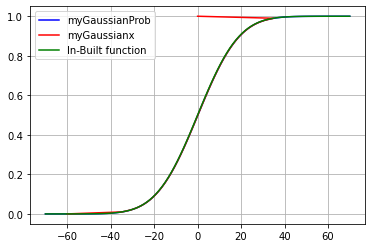

In [19]:
# Number of points 'a' where y = P(x<=a) will be computed 
nop=100 

# Example values of mu and sig
mu=0
sig=15

# Method (a)    
a1 = np.linspace(-70,70,nop)
y1 = np.zeros(nop)
for i in np.arange(nop):
    y1[i]=myGaussianProb(mu,sig,a1[i])

# Method (b)
y2=np.linspace(0,1,nop)
a2 = np.zeros(nop)
#q = np.zeros(nop)
for i in np.arange(nop -1):
    a2[i]=myGaussianx(mu,sig,y2[i])

# I don't know why my internal function for spline evaluating at last point
    
# Method (c)    
a3 = np.linspace(-70,70,nop)
y3 = np.zeros(nop)
p = norm(mu, sig)
for i in np.arange(nop):
    y3[i]=p.cdf(a3[i])
    
# Plot (a1,y1), (a2,y2) and (a3,y3) in one plot    
plt.plot(a1,y1,'b')
plt.plot(a2,y2,'r')
plt.plot(a3,y3,'g')
plt.legend(['myGaussianProb','myGaussianx','In-Built function'])
plt.grid()
plt.show()

### <font color=red> Nice try. You did not compute errors.Q.3 1/2 <font>

### <font color=red> Total: 12/15. Good!<font>